In [51]:
import gym
import numpy as np
import random
from pylab import *

In [52]:
env = gym.make('FrozenLake-v0')

In [53]:
class FrozenLake:
  def __init__(self):
    # attributes
    self.Q = np.zeros([env.observation_space.n,env.action_space.n])
    self.reward_total = []
    self.steps_total = []
    # parameters
    self.num_episodes = 2000
    self.max_steps = 100
    self.learning_rate = 0.8
    self.gamma = 0.95
    # self.egreedy = 0.90
    # self.egreedy_decay = 0.999
    # self.egreedy_final = 0.005
  
  def run(self):
    for i in range(self.num_episodes):
      reward_episode = 0
      steps_episode = 0
      state = env.reset()
      
      # for each step (action made) in one episode
      while steps_episode < self.max_steps:
        # get action (with randomness)
        actions_for_state = self.Q[state,:] + np.random.randn(1, env.action_space.n) / (i + 1) # reduce randomness in action as episode number increase
        action = np.argmax(actions_for_state)
        
        # # egreedy
        # if np.random.rand(1)[0] < self.egreedy:
        #   action = env.action_space.sample()
        # if self.egreedy > self.egreedy_final:
        #   self.egreedy *= self.egreedy_decay
          

        # make step with action
        new_state, reward, done, _ = env.step(action)

        # update Q table
        old_estimate = self.Q[state,action]
        step_size = self.learning_rate
        target = reward + self.gamma * np.max(self.Q[new_state,:])
        self.Q[state,action] = old_estimate + step_size * (target - old_estimate)

        # update variables
        state = new_state
        reward_episode += reward
        steps_episode += 1
        
        if done:
          break
      # update graphing arrays
      self.reward_total.append(reward_episode)
      self.steps_total.append(steps_episode)

      if i%100 == 0: # printing
        print(f'Step{i}: reward - {reward_episode} :: steps - {steps_episode}')
    
  def plot(self):
    subplot(211)
    plot(self.avr_pass(self.reward_total), 'b', label="Mean Reward per 100 Episode")
    legend(loc="best")

    subplot(212)
    plot(self.avr_pass(self.steps_total), label="Total Number of Steps per Episode")
    legend(loc="best")
    show()

  def low_pass(self, data, alpha=0.99):
    low_pass = [data[0]]
    for i in range(1,len(data)):
      low_pass.append(alpha*low_pass[-1] + (1.0-alpha)*data[i] )
    return low_pass
  
  def avr_pass(self, data, alpha=100):
    avr_pass = []
    for i in range(alpha - 1,len(data), alpha):
      avr_pass.append(np.mean(data[i - alpha + 1:i]))
    return avr_pass


Step0: reward - 0.0 :: steps - 7
Step100: reward - 0.0 :: steps - 2
Step200: reward - 0.0 :: steps - 8
Step300: reward - 1.0 :: steps - 50
Step400: reward - 1.0 :: steps - 72
Step500: reward - 0.0 :: steps - 44
Step600: reward - 1.0 :: steps - 48
Step700: reward - 1.0 :: steps - 22
Step800: reward - 1.0 :: steps - 17
Step900: reward - 0.0 :: steps - 100
Step1000: reward - 1.0 :: steps - 18
Step1100: reward - 0.0 :: steps - 100
Step1200: reward - 1.0 :: steps - 31
Step1300: reward - 1.0 :: steps - 16
Step1400: reward - 1.0 :: steps - 38
Step1500: reward - 0.0 :: steps - 100
Step1600: reward - 0.0 :: steps - 5
Step1700: reward - 1.0 :: steps - 13
Step1800: reward - 1.0 :: steps - 95
Step1900: reward - 1.0 :: steps - 12


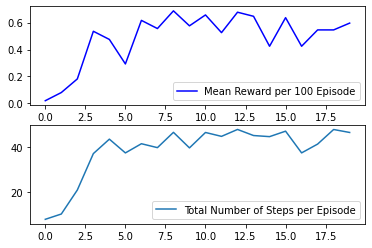

In [54]:
lake = FrozenLake()

lake.run()
lake.plot()